In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---------------

`This script plots rainfed cropET values for major crop types in three regions of the HPA (Kansas, Texas, and Nebraska). The analysis helps visulization of why effective precipitation training data was sampled from the pasture croplands over the Western US. The reason is - ET from rainfed p[asture and other crop types have similar distribution. Over the entire Western US, rainfed cropland (pure crop, not pasture) was not available in all regions but rainfed pasture was. So, by taking effective precipitation training data from rainfed pasture, we were able to ensure that the training data is representative of the entire Western US.`

--------

In [3]:
# USDA CDL crop classification
USDA_cdl_class_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/USDA_cdl_classification.csv')
USDA_cdl_class_df = USDA_cdl_class_df.set_index(keys='Class')
# USDA_cdl_class_df.head()

# making the df to a dictionary
usda_cdl_dict = USDA_cdl_class_df.to_dict()
usda_cdl_dict = usda_cdl_dict['Crop']
usda_cdl_dict

{1: 'Corn',
 2: 'Cotton',
 3: 'Rice',
 4: 'Sorghum',
 5: 'Soybeans',
 6: 'Sunflower',
 10: 'Peanuts',
 11: 'Tobacco',
 12: 'Sweet Corn',
 13: 'Pop or Orn Corn',
 14: 'Mint',
 21: 'Barley',
 22: 'Durum Wheat',
 23: 'Spring Wheat',
 24: 'Winter Wheat',
 25: 'Other Small Grains',
 26: 'Dbl Crop WinWht/Soybeans',
 27: 'Rye',
 28: 'Oats',
 29: 'Millet',
 30: 'Speltz',
 31: 'Canola',
 32: 'Flaxseed',
 33: 'Safflower',
 34: 'Rape Seed',
 35: 'Mustard',
 36: 'Alfalfa',
 37: 'Other Hay/Non Alfalfa',
 38: 'Camelina',
 39: 'Buckwheat',
 41: 'Sugarbeets',
 42: 'Dry Beans',
 43: 'Potatoes',
 44: 'Other Crops',
 45: 'Sugarcane',
 46: 'Sweet Potatoes',
 47: 'Misc Vegs & Fruits',
 48: 'Watermelons',
 49: 'Onions',
 50: 'Cucumbers',
 51: 'Chick Peas',
 52: 'Lentils',
 53: 'Peas',
 54: 'Tomatoes',
 55: 'Caneberries',
 56: 'Hops',
 57: 'Herbs',
 58: 'Clover/Wildflowers',
 59: 'Sod/Grass Seed',
 60: 'Switchgrass',
 61: 'Fallow/Idle Cropland',
 63: 'Forest',
 64: 'Shrubland',
 65: 'Barren',
 66: 'Cherries'

In [6]:
# loading annual rainfed cropET data for KS, NE, and TX
ks_df = pd.read_csv('../../Data_main/results_eval/rainfed_cropET_compare/KS/KS_cropET.csv')
ne_df = pd.read_csv('../../Data_main/results_eval/rainfed_cropET_compare/NE/NE_cropET.csv')
tx_df = pd.read_csv('../../Data_main/results_eval/rainfed_cropET_compare/TX/TX_cropET.csv')

# Making a new colum with crop name in each dataset
ks_df['Crop'] = ks_df['USDA_CDL'].apply(lambda x: usda_cdl_dict[int(x)])
ne_df['Crop'] = ne_df['USDA_CDL'].apply(lambda x: usda_cdl_dict[int(x)])
tx_df['Crop'] = tx_df['USDA_CDL'].apply(lambda x: usda_cdl_dict[int(x)])

In [7]:
# Filtering the datasets from major crop types in each region and rrainfed cropland
ks_df_fil = ks_df[(ks_df['Crop'].isin(['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans', 'Pasture/Grassland'])) & 
                  (ks_df['Rainfed'] == 1)]
ne_df_fil = ne_df[(ne_df['Crop'].isin(['Corn', 'Winter Wheat', 'Alfalfa', 'Soybeans', 'Pasture/Grassland'])) & 
                  (ne_df['Rainfed'] == 1)]
tx_df_fil = tx_df[(tx_df['Crop'].isin(['Corn', 'Cotton', 'Winter Wheat', 'Sorghum', 'Pasture/Grassland'])) & 
                  (tx_df['Rainfed'] == 1)]

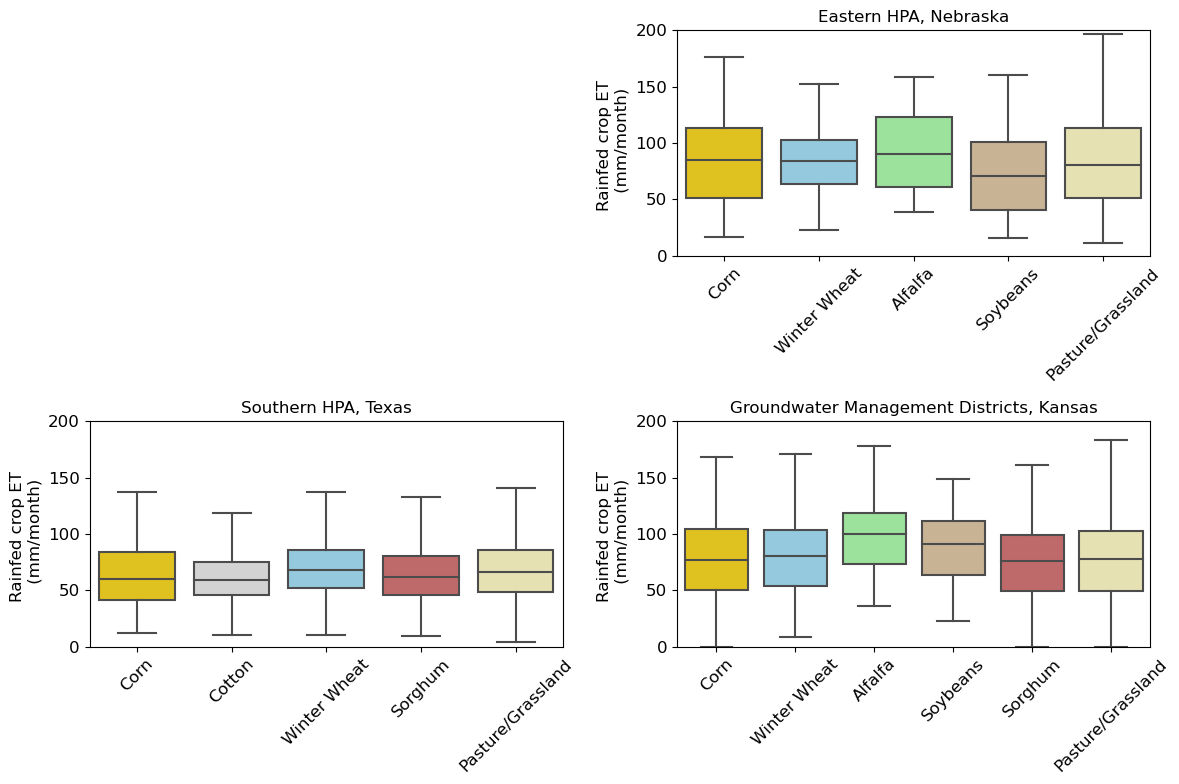

In [8]:
# Plotting major irrigated and rainfed crops' yearly irrigated and rainfed cropET
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

plt.rcParams['font.size'] = '12'

# setting similar color palette for similar crops 
category_colors = {'Corn': 'gold', 'Winter Wheat': 'skyblue', 'Sorghum': 'indianred', 'Alfalfa': 'lightgreen', 
                    'Cotton': 'lightgrey', 'Soybeans': 'tan', 'Pasture/Grassland': 'palegoldenrod'}

# category order
category_order_ks = ['Corn', 'Winter Wheat', 'Alfalfa', 'Soybeans', 'Sorghum', 'Pasture/Grassland']
category_order_ne = ['Corn', 'Winter Wheat', 'Alfalfa', 'Soybeans', 'Pasture/Grassland']
category_order_tx = ['Corn', 'Cotton', 'Winter Wheat', 'Sorghum', 'Pasture/Grassland']

# turning off the empyt plot at [1, 0] location
ax[0, 0].set_axis_off()

# NE
sns.boxplot(x=ne_df_fil['Crop'], y=ne_df_fil['Rainfed_cropET'], ax=ax[0, 1], 
            palette=category_colors, order=category_order_ne, showfliers=False)
ax[0, 1].set_ylabel('Rainfed crop ET \n (mm/month)', fontsize=12)
ax[0, 1].set_xlabel(None)
ax[0, 1].set_xticklabels(category_order_ne, rotation=45)
ax[0, 1].set_title('Eastern HPA, Nebraska', fontsize=12)
ax[0, 1].set_ylim([0, 200])

# KS
sns.boxplot(x=ks_df_fil['Crop'], y=ks_df_fil['Rainfed_cropET'], ax=ax[1, 1], 
            palette=category_colors, order=category_order_ks, showfliers=False)
ax[1, 1].set_ylabel('Rainfed crop ET \n (mm/month)', fontsize=12)
ax[1, 1].set_xlabel(None)
ax[1, 1].set_xticklabels(category_order_ks, rotation=45)
ax[1, 1].set_title('Groundwater Management Districts, Kansas', fontsize=12)
ax[1, 1].set_ylim([0, 200])

# TX
sns.boxplot(x=tx_df_fil['Crop'], y=tx_df_fil['Rainfed_cropET'], ax=ax[1, 0], 
            palette=category_colors, order=category_order_tx, showfliers=False)
ax[1, 0].set_xlabel(None)
ax[1, 0].set_ylabel('Rainfed crop ET \n (mm/month)', fontsize=12)
ax[1, 0].set_xticklabels(category_order_tx, rotation=45)
ax[1, 0].set_title('Southern HPA, Texas', fontsize=12)
ax[1, 0].set_ylim([0, 200])


plt.tight_layout()

fig.savefig('plots/rainfed_cropET.png', dpi=300)